# Customer Churn Analysis


## Importing Libraries 

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [87]:
# Loading the Dataset
df=pd.read_csv("customer_churn.csv")

pd.set_option('display.max_columns',None)

# printing first 5 rows of the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Task
 - Its a binary classification problem and our task is to predict whether a customer churns or not.

In [88]:
# checking the number of rows and columns in the dataset
df.shape

(7043, 21)

- In our dataset, we have 7043 rows anfd 21 columns including the target variable "Churn".

In [89]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [90]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Here we see that there are no null values in our dataset.
- We have 18 columns having object type values including our target variable "Churn".

Here we see that MonthlyCharges is of float type, however TotalCharges is of object type having 7043. For object type values we cannot be 100% sure that all the values would be non-null. So in order to confirm that we need to convert our object values to numeric datatype.

In [91]:
# checking the blank spaces count in TotalCharges column
df['TotalCharges'].isin([' ']).sum()

11

- This means that there are total 11 blank spaces entries for TotalCharges column. We need to convert this to NaN values and then cast type to float.

In [92]:
# Replacing the blank values with NaN 
df['TotalCharges']=df["TotalCharges"].replace(' ',np.nan)

# Converting datatype to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], downcast="float")
df["TotalCharges"].dtype

dtype('float32')

- Great! Now the blank spaces are filled with NaN and datatype is changed to float.

In [93]:
# checking the unique value count for each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

- customerID has 7043 unique IDs. We can drop this column, as it will not help in model building.
- Mostly we have categorical columns having 2 to 3 unique values.

In [94]:
# checking the missing value count
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Here, we see that we have 11 missing values for the TotalCharges column. We will see it how to fill the values.

In [95]:
# checking the unique value count for target variable "Churn"
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

- Majority of the customers did not Churn. 
- Here we observe a data imbalance in the target variable. We need to treat this.

In [96]:
# checking the unique value count for Gender column
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

- We have almost equal number of Males and Females in our dataset.

In [97]:
# checking the value count of Senior Citizens
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

- Majority of the customers are not Senior Citizens.

In [98]:
# checking the value count for Partner column
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

- Number of customers having partner and not having partner is almost same.

In [99]:
# checking the value counts for Dependents column
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

- Majority of the customers don't have dependents. 

In [100]:
# checking value counts for the PhoneService column
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

- Majority of the customers has Phone Service. There are very few who does not have. 

In [101]:
# checking the value count for MultipleLines column
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

- Majority of the people does not have Multiple Line service. 
- Very few people has No phone service.

In [102]:
# checking value counts for InsernetService column
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

- Majority of the customers have Fiber Optic internet service and others have DSL.
- There are also customers who does not have Internet Service.

In [103]:
# checking value count for OnlineSecurity column
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

- Maximum of the people having Internet Service have not subscribed for Online Security.

In [104]:
# checking value counts for Online Backup column
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

- Maximum of the people having Internet Service have not subscribed for Online Backup.

In [105]:
# checking value count for Device Protection column
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

- Maximum of the people having Internet Service have not subscribed for Device Protection.

In [106]:
# checking value count for Tech Support column
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

- Maximum of the people having Internet Service have not subscribed for Tech Support.

In [107]:
# checking value count for StreamingTV column
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

- Out of the people having internet service 50% have subscribed for TV streaming and 50% have not.

In [108]:
# checking value count for StreamingMovies column
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

- Out of the people having internet service 50% have subscribed for streaming Movies and 50% have not.

In [109]:
# checking value count for Contract column
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

- Maximum number of customers have Month-to-Month subscription.
- Least number of customers has 1 year subscription.

In [110]:
# checking value count for PaperlessBilling column
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

- Majority of the customers have Paperless Billing.

In [111]:
# checking value count for PaperlessBilling column
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

- Majority of the customers prefer Electronic check payment method.

In [112]:
# statistical information
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.298340
std,0.368612,24.559481,30.090047,2266.770508
min,0.000000,0.000000,18.250000,18.799999
25%,0.000000,9.000000,35.500000,401.450012
50%,0.000000,29.000000,70.350000,1397.475098
75%,0.000000,55.000000,89.850000,3794.737549
max,1.000000,72.000000,118.750000,8684.799805


#### Observations:
- SeniorCitizen is actually a categorical variable and hence 25%-50%-75% distribution is not proper.
- 75% customers have tenure less than 55 months.
- Average monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.

### Churning Ratio - Target Variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

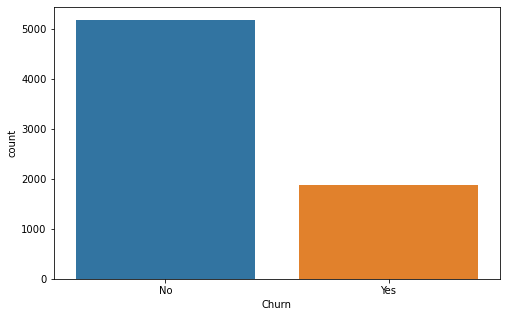

In [113]:
plt.figure(figsize=(8,5))
sns.countplot(df["Churn"])

In [114]:
# checking the value percentage
df["Churn"].value_counts()/len(df["Churn"])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

#### Observations:
- Data is highly imbalanced,ratio 73:27
- So we analyze the data with other features while taking the target values seperately to get some insights.

### Missing Values

- As we have seen there are 11 missing values in TotalCharges column. Let's check these records.

In [115]:
df[df["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Since the percentage of these records compared to total dataset is very low that is 0.15%, it is safe to ignore them from further processing.

In [116]:
# Removing missing values
df.dropna(inplace=True)

- As we have removed the null values, let's check the missing values count again!

In [117]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Great! Now there are no null values in the dataset.

### Creating New Column based on the Existing One

- Let's divide customers into bins based on tenure for example, for tenure < 12, assign a tenure group 1 - 12, for teure between 1 - 2 yrs, a tenure group 13 - 24 and so on....

In [118]:
# Get the max tenure
df["tenure"].max()

72

In [119]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

# Creating new column Tenure_group based on the bins
df["Tenure_group"]=pd.cut(df.tenure,range(1,80,12),right=False,labels=labels)

In [120]:
df["Tenure_group"].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: Tenure_group, dtype: int64

- Great! Bins are successfully created and new column is added! 

### Remove Columns not required for Processing

In [121]:
# drop columns customerID and tenure
df.drop(["customerID","tenure"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,1 - 12


## Exploratory Data Analysis

### A] Univariate Analysis

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

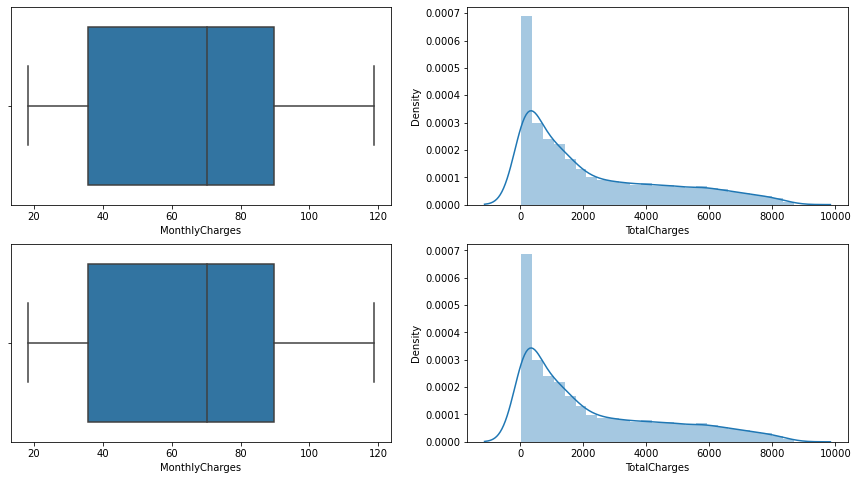

In [122]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.boxplot(df["MonthlyCharges"])
plt.subplot(2,2,2)
sns.distplot(df["TotalCharges"])

plt.subplot(2,2,3)
sns.boxplot(df["MonthlyCharges"])
plt.subplot(2,2,4)
sns.distplot(df["TotalCharges"])


<AxesSubplot:xlabel='gender', ylabel='count'>

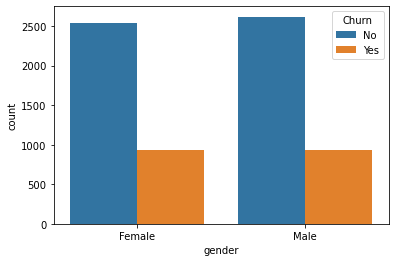

In [123]:
# Gender vs Churn
sns.countplot(x="gender",hue="Churn",data=df)

#### Observation:
- The Churning and Not Churning ratio is almost 50% for Male and Females.
- Gender as standalone is not a important feature. However, if we combine it with other features then it can make sense.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

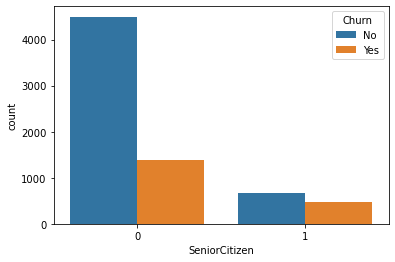

In [124]:
# SeniorCitizen vs Churn
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

#### Observation:
  - 0 => SeniorCitizen
  - 1 => Non-SeniorCitizen
- We have more number of Non-SeniorCitizens but the churning ratio is very high in SeniorCitizens, almost 42%.
- If a customer is Senior Citizen then he is more likely to Churn. 

<AxesSubplot:xlabel='Partner', ylabel='count'>

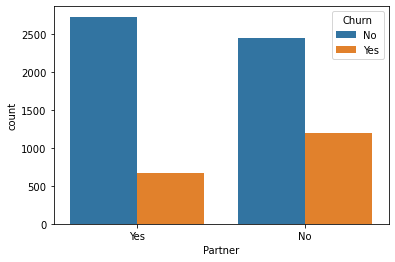

In [125]:
# Partner vs Churn
sns.countplot(x="Partner",hue="Churn",data=df)

#### Observation:
- Churning ratio is high ie. 33% when the customer is single or not having a partner. That means if somebody is not having a partner, he is more likely to Churn. 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

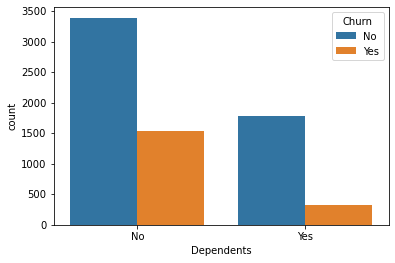

In [126]:
# Dependents vs Churn
sns.countplot(x="Dependents",hue="Churn",data=df)

#### Observation:
- Churning ratio is high(31%) for the customers not having Dependents.
- When customer has dependents he is less likely to Churn.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

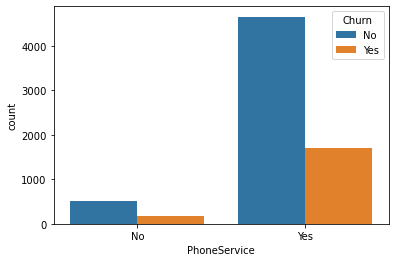

In [127]:
# PhoneService vs Churn
sns.countplot(x="PhoneService",hue="Churn",data=df)

#### Observation:
- Churning ratio is a little high(27%) for the customers having Phone Service.
- People with Phone Service are more likely to Churn.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

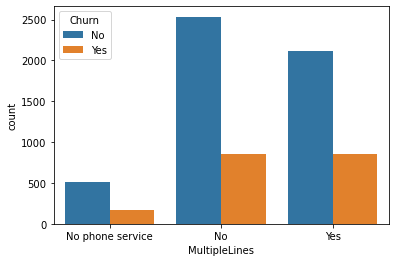

In [128]:
# MultipleLines vs Churn
sns.countplot(x="MultipleLines",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(29%) for the customers having multiple lines.
- Customers having Multiple Lines are more likely to Churn.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

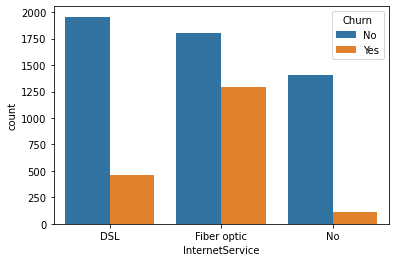

In [129]:
# InternetService vs Churn
sns.countplot(x="InternetService",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(42%) for the customers having Fiber Optic internet service and its lowest(7.4%) for the customers not having Internet Service.
- People having Fiber Optic Internet Service are more likely to Churn.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

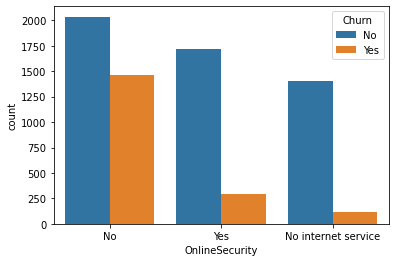

In [130]:
# OnlineSecurity vs Churn
sns.countplot(x="OnlineSecurity",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(42%) for the customers not having Online Security service.
- People with no Online Security are more likely to Churn.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

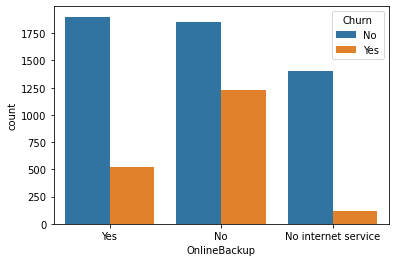

In [131]:
# OnlineBackup vs Churn
sns.countplot(x="OnlineBackup",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(40%) for the customers not opting for Online Backup.
- People with on Onine Backup are more likely to Churn.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

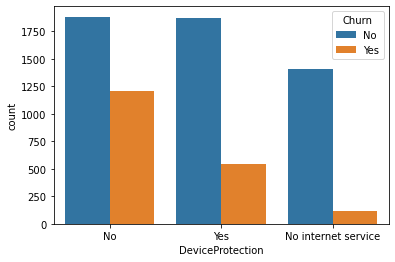

In [132]:
# DeviceProtection vs Churn
sns.countplot(x="DeviceProtection",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(39%) for the customers not opting for Device Protection.
- People with no Device Protection are more likely to Churn.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

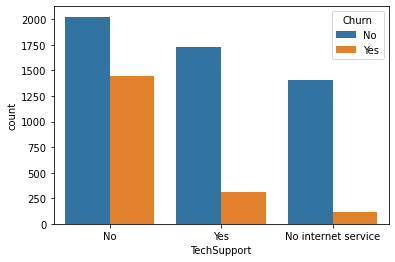

In [133]:
# TechSupport vs Churn
sns.countplot(x="TechSupport",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(42%) for the customers not opted for Tech Support.
- People not having Tech Support is more likely to Churn.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

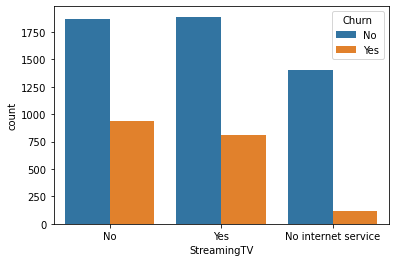

In [134]:
# StreamingTV vs Churn
sns.countplot(x="StreamingTV",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(34%) for the customers who have not subscribed for Streaming TV.
- People having no TV Streaming are more likely to Churn.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

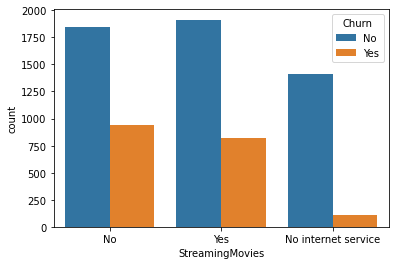

In [135]:
# StreamingMovies vs Churn
sns.countplot(x="StreamingMovies",hue="Churn",data=df)

#### Observation:
- Churning ratio is little highest(34%) for the customers who have not subscribed for Movie Streaming.
- People not subscribed to Movie Streaming are more likely to Churn.

<AxesSubplot:xlabel='Contract', ylabel='count'>

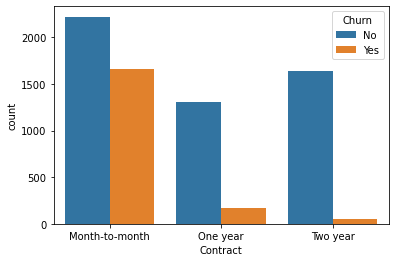

In [136]:
# Contract vs Churn
sns.countplot(x="Contract",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(75%) for the customers having Month-to-Month contract and its lowest(3%) for customers having Two years contract.
- People having Month-to-month contract are more likely to Churn.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

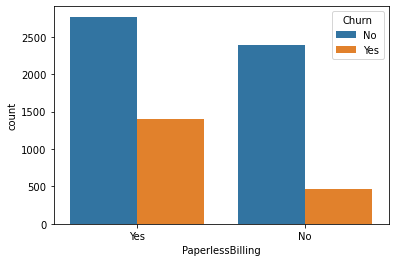

In [137]:
# PaperlessBilling vs Churn
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(34%) for the customers having Paperless Billing.
- People opted for Paperless Billing are more likely to Churn.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

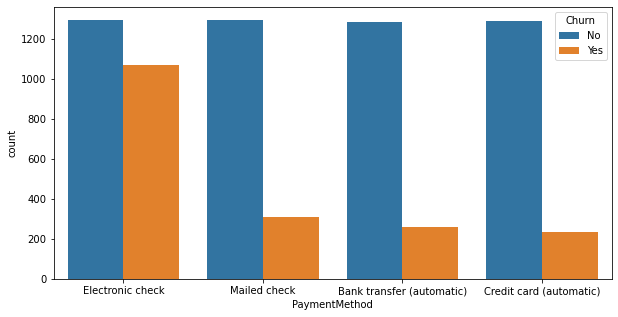

In [138]:
# PaymentMethod vs Churn
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(45%) for customers going for Electronic Check and its lowest(15%) for Credit Card.
- People going for Electronic Check are more likely to Churn.

<AxesSubplot:xlabel='Tenure_group', ylabel='count'>

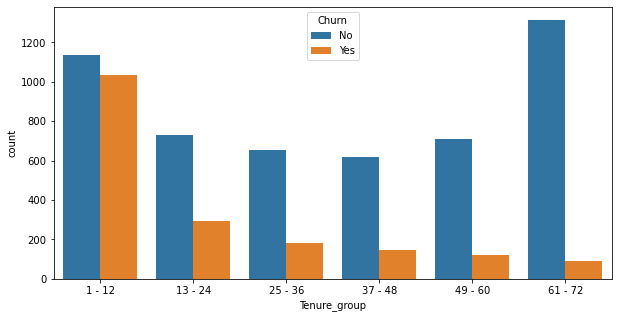

In [139]:
# Tenure_group vs Churn
plt.figure(figsize=(10,5))
sns.countplot(x="Tenure_group",hue="Churn",data=df)

#### Observation:
- Churning ratio is highest(48%) for the customers belonging to 1 - 12 tenure group. Its lowest for the customers belonging to 61 - 72 tenure group.
- Newly joined customers are more likely to Churn. Old customers are not likely to Churn.

### B] Bivariate Analysis

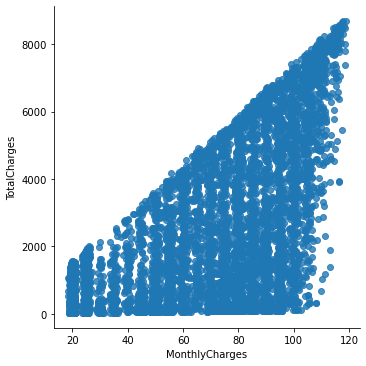

In [140]:
sns.lmplot(data=df,x="MonthlyCharges",y="TotalCharges",fit_reg=False)

- Total Charges increases as Monthly Charges increase - as expected.

Text(0.5, 1.0, 'Monthly Charges by Churn')

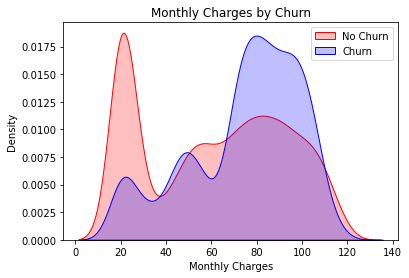

In [141]:
Mth=sns.kdeplot(df.MonthlyCharges[(df["Churn"]=="No")],color="Red",shade=True)

Mth=sns.kdeplot(df.MonthlyCharges[(df["Churn"]=="Yes")],ax=Mth,color="Blue",shade=True)

Mth.legend(["No Churn","Churn"],loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title("Monthly Charges by Churn")

#### Observation:
- Churn is high when Monthly Charges are high.

Text(0.5, 1.0, 'Monthly Charges by Churn')

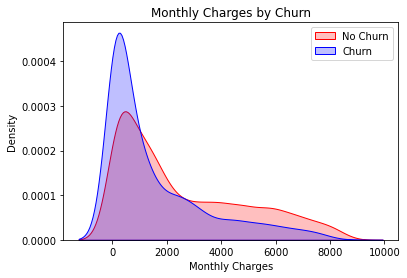

In [142]:
Tot=sns.kdeplot(df.TotalCharges[(df["Churn"]=="No")],color="Red",shade=True)

Tot=sns.kdeplot(df.TotalCharges[(df["Churn"]=="Yes")],ax=Tot,color="Blue",shade=True)

Tot.legend(["No Churn","Churn"],loc="upper right")
Tot.set_ylabel("Density")
Tot.set_xlabel("Monthly Charges")
Tot.set_title("Monthly Charges by Churn")

#### Observation:
- Surprisingly here we observe that Churn is higher at lower Total Charges.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

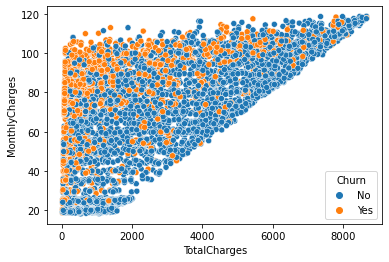

In [143]:
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",hue="Churn",data=df)

#### Observation:
- Customers having high monthly charges are more likely to Churn.

### Encoding Target Variable - Churn

In [144]:
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1,1 - 12


### OneHotEncoding All Categorical Variables

In [145]:
df=pd.get_dummies(df)
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,29.85,29.850000,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.500000,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.150002,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.750000,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.649994,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [146]:
df.shape

(7032, 51)

<AxesSubplot:>

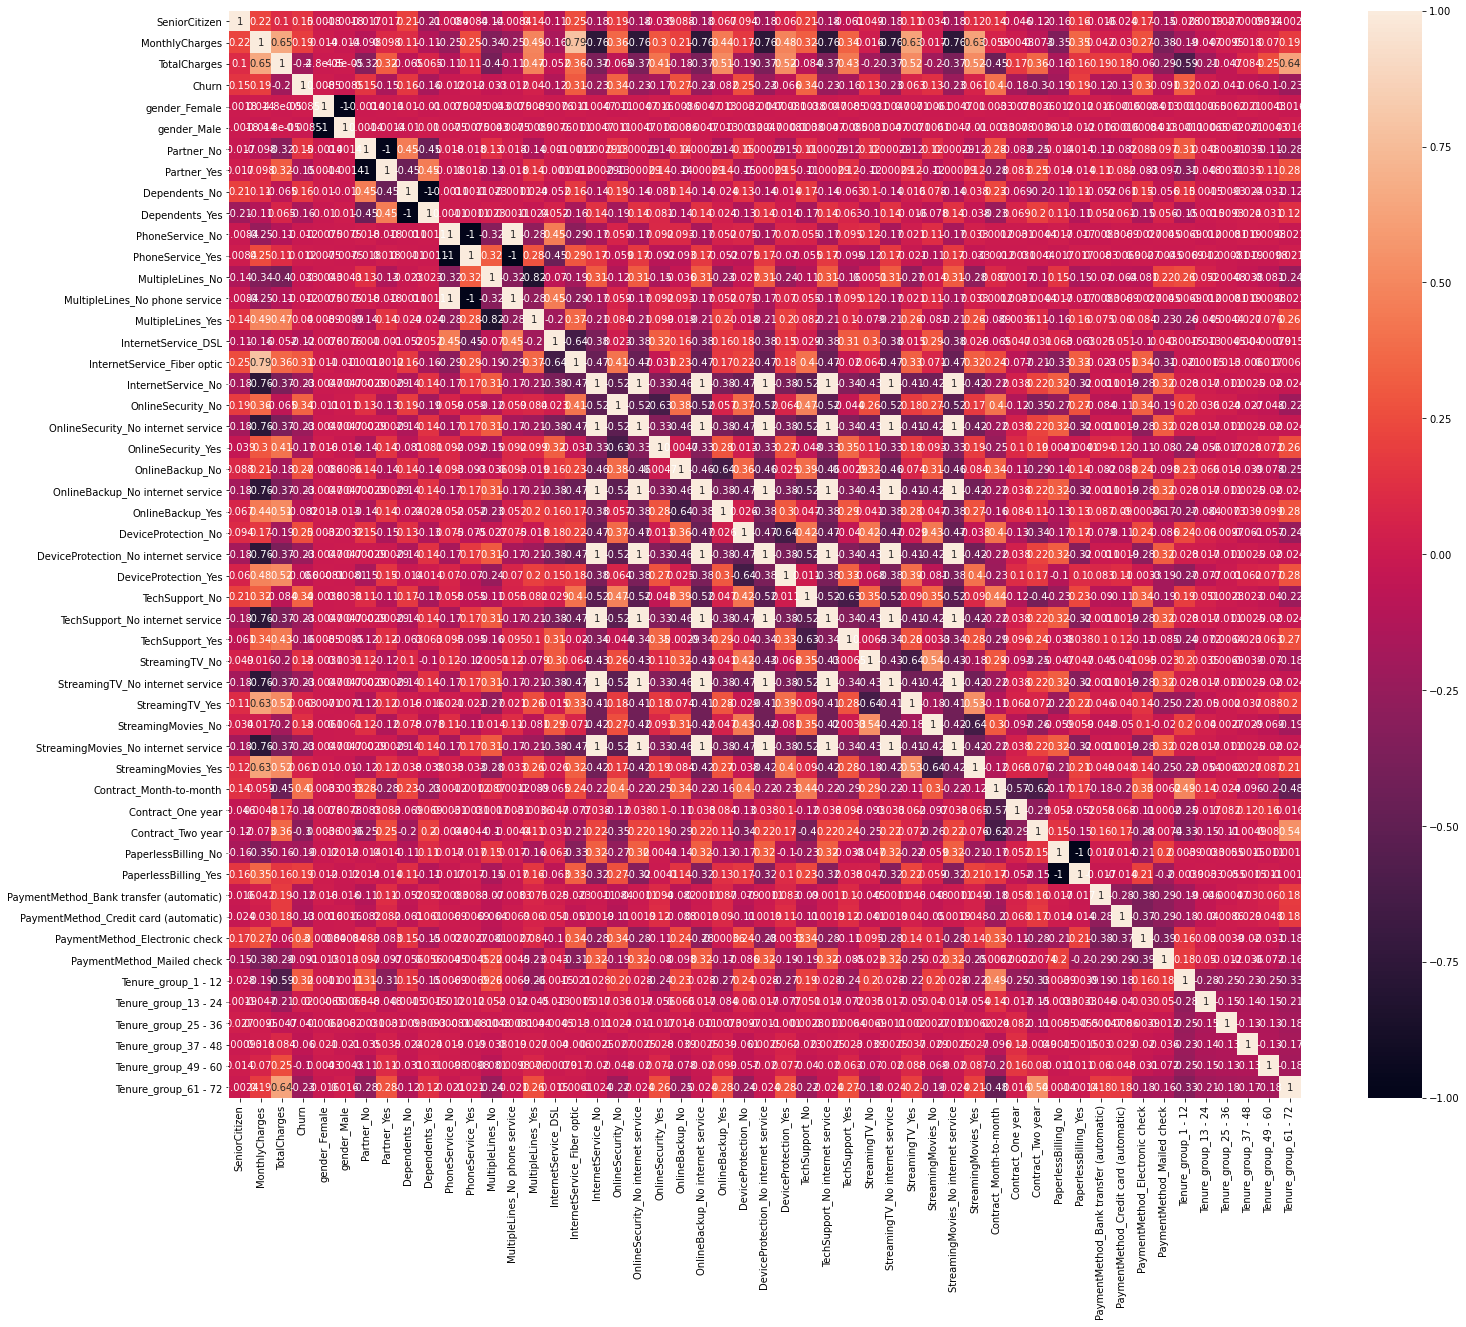

In [147]:
plt.figure(figsize=(24,20))
sns.heatmap(df.corr(),annot=True)

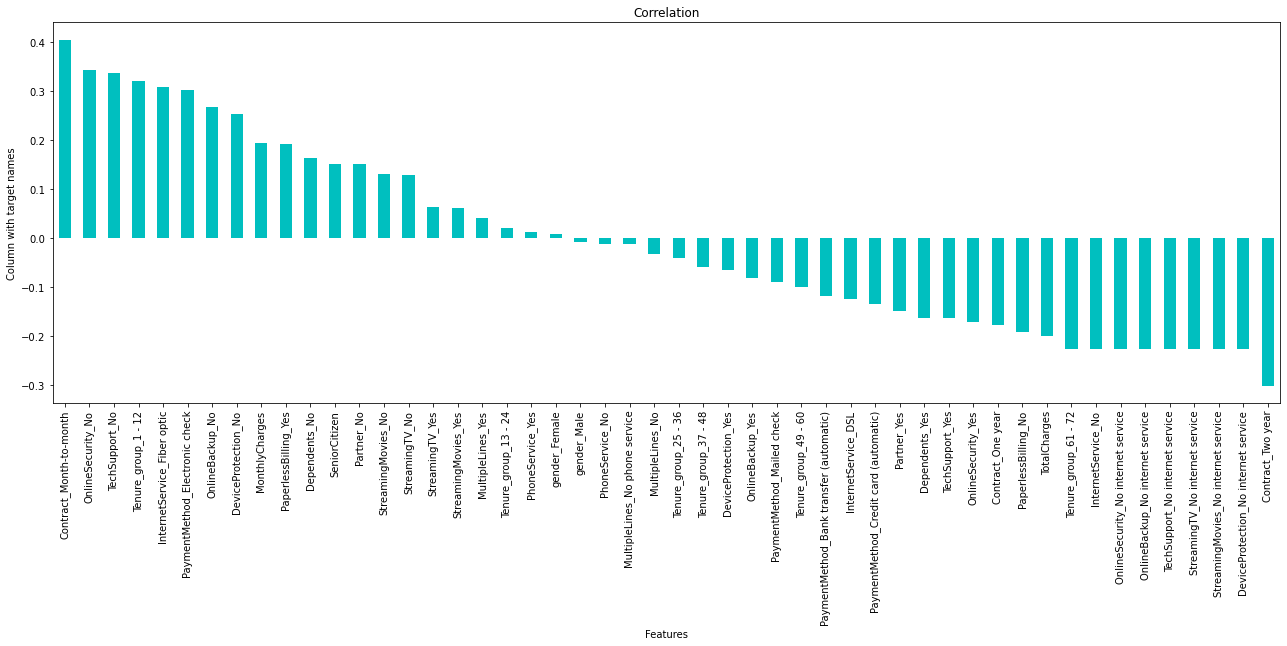

In [148]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

#### Observations:
- Target variable "Churn" is highly correlated with Contract_Month_to_month, OnlineSecurity_No, TechSupport_No, Tenure_group_1-12, InternetService_Fiber optic, PaymentMethod_Electronic check.
- Its has almost no correlation with gender_Female, gender_Male, PhoneService_Yes, Tenure_group_13-24, PhoneService_No.

### Outliers

- As we have checked above, there are no outliers for our numerical columns.

### Creating X an Y Split

In [149]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

### Checking skewness

In [150]:
x.skew()

SeniorCitizen                              1.831103
MonthlyCharges                            -0.222103
TotalCharges                               0.961643
gender_Female                              0.018776
gender_Male                               -0.018776
Partner_No                                -0.070024
Partner_Yes                                0.070024
Dependents_No                             -0.880908
Dependents_Yes                             0.880908
PhoneService_No                            2.729727
PhoneService_Yes                          -2.729727
MultipleLines_No                           0.074584
MultipleLines_No phone service             2.729727
MultipleLines_Yes                          0.316232
InternetService_DSL                        0.658922
InternetService_Fiber optic                0.240682
InternetService_No                         1.379453
OnlineSecurity_No                          0.010810
OnlineSecurity_No internet service         1.379453
OnlineSecuri

- We can ignore the skewness for the categorical columns. We see skewness for the column : TotalCharges

In [151]:
x["TotalCharges"]=np.sqrt(x["TotalCharges"])

In [152]:
x["TotalCharges"].skew()

0.30892614

- Now, the all the skew values are between -0.5 to +0.5.

### Treating Imbalanced Data

In [153]:
# Doing over sampling
from imblearn.over_sampling import SMOTE

In [154]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [155]:
# checking value counts for target variable after balancing data
y.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

- Now, our dataset is balanced.

### Scaling

- There is a difference the range of values for some columns. So to avoid model biasedness due to this, let's do scaling.

In [156]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

In [157]:
SS=StandardScaler()
x_scaled=SS.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,-0.402395,-1.319505,-1.339231,1.118107,-0.891916,-1.038510,1.251441,0.626564,-0.532775,3.134310,-3.023809,-0.881115,3.134310,-0.821381,1.499397,-1.039719,-0.444092,0.875234,-0.444092,-0.518218,-0.959562,-0.444092,1.594099,1.051080,-0.444092,-0.636917,0.882329,-0.444092,-0.526779,1.20288,-0.444092,-0.781453,1.203603,-0.444092,-0.781132,0.736910,-0.422649,-0.445497,-0.676195,0.799893,-0.435309,-0.427889,1.331195,-0.468109,1.271806,-0.419142,-0.345821,-0.320889,-0.329265,-0.419142
1,-0.402395,-0.379042,0.221686,-0.894369,1.121182,0.962918,-0.799079,0.626564,-0.532775,-0.319049,0.330709,1.134926,-0.319049,-0.821381,1.499397,-1.039719,-0.444092,-1.142552,-0.444092,1.929688,1.042142,-0.444092,-0.627314,-0.951402,-0.444092,1.570064,0.882329,-0.444092,-0.526779,1.20288,-0.444092,-0.781453,1.203603,-0.444092,-0.781132,-1.357018,2.366027,-0.445497,1.478863,-1.250168,-0.435309,-0.427889,-0.751205,2.136253,-0.786283,-0.419142,2.891667,-0.320889,-0.329265,-0.419142
2,-0.402395,-0.486623,-1.136502,-0.894369,1.121182,0.962918,-0.799079,0.626564,-0.532775,-0.319049,0.330709,1.134926,-0.319049,-0.821381,1.499397,-1.039719,-0.444092,-1.142552,-0.444092,1.929688,-0.959562,-0.444092,1.594099,1.051080,-0.444092,-0.636917,0.882329,-0.444092,-0.526779,1.20288,-0.444092,-0.781453,1.203603,-0.444092,-0.781132,0.736910,-0.422649,-0.445497,-0.676195,0.799893,-0.435309,-0.427889,-0.751205,2.136253,1.271806,-0.419142,-0.345821,-0.320889,-0.329265,-0.419142
3,-0.402395,-0.887447,0.198504,-0.894369,1.121182,0.962918,-0.799079,0.626564,-0.532775,3.134310,-3.023809,-0.881115,3.134310,-0.821381,1.499397,-1.039719,-0.444092,-1.142552,-0.444092,1.929688,1.042142,-0.444092,-0.627314,-0.951402,-0.444092,1.570064,-1.133364,-0.444092,1.898330,1.20288,-0.444092,-0.781453,1.203603,-0.444092,-0.781132,-1.357018,2.366027,-0.445497,1.478863,-1.250168,2.297216,-0.427889,-0.751205,-0.468109,-0.786283,-0.419142,-0.345821,3.116347,-0.329265,-0.419142
4,-0.402395,0.098130,-1.057846,1.118107,-0.891916,0.962918,-0.799079,0.626564,-0.532775,-0.319049,0.330709,1.134926,-0.319049,-0.821381,-0.666935,0.961798,-0.444092,0.875234,-0.444092,-0.518218,1.042142,-0.444092,-0.627314,1.051080,-0.444092,-0.636917,0.882329,-0.444092,-0.526779,1.20288,-0.444092,-0.781453,1.203603,-0.444092,-0.781132,0.736910,-0.422649,-0.445497,-0.676195,0.799893,-0.435309,-0.427889,1.331195,-0.468109,1.271806,-0.419142,-0.345821,-0.320889,-0.329265,-0.419142


- Now, all the features values are scaled and the model building will not be biased.
- As we have only 50 features in our dataset, we will not perform PCA.

## Building the Model

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [159]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.8746369796708615  on Random State  103


- Using the best Random State to create new train_test_split.

In [160]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=maxRS)

In [161]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1.LogisticRegression

In [162]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[907  97]
 [162 900]] 

Accuracy Score: 87.46369796708615
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1004
           1       0.90      0.85      0.87      1062

    accuracy                           0.87      2066
   macro avg       0.88      0.88      0.87      2066
weighted avg       0.88      0.87      0.87      2066



#### 2. DecisionTreeClassifier

In [163]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[778 226]
 [171 891]] 

Accuracy Score: 80.78412391093902
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1004
           1       0.80      0.84      0.82      1062

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



#### 3. RandomForestClassifier

In [164]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[874 130]
 [136 926]] 

Accuracy Score: 87.12487899322362
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1004
           1       0.88      0.87      0.87      1062

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066



#### 4. SVC

In [165]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[890 114]
 [160 902]] 

Accuracy Score: 86.73765730880929
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1004
           1       0.89      0.85      0.87      1062

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066



- Here, we observe that RandomForestClassifier is giving the highest accuracy score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.8374163031580132


In [168]:
print(cross_val_score(DTC,x,y,cv=5).mean()) #cross validation score for DecisionTreeClassifier

0.797416631311983


In [169]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.8459351802151283


In [170]:
print(cross_val_score(SC,x,y,cv=5).mean()) #cross validation score for SVC

0.8279250590091156


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

### Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [171]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [173]:
parameters={'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'n_estimators':[40,50,60,100],
           'max_depth':[2,3,4,5,6]}

In [174]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [40, 50, 60, 100]})

In [176]:
GCVRFC.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 60}

In [177]:
Final_modRFC=RandomForestClassifier(criterion="entropy",max_depth=6,max_features='auto',n_estimators=60)
Final_modRFC.fit(x_train,y_train)
pred=Final_modRFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[767 237]
 [111 951]] 

Accuracy Score: 83.15585672797677
              precision    recall  f1-score   support

           0       0.87      0.76      0.82      1004
           1       0.80      0.90      0.85      1062

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066



After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 83%

### Plotting AUC_ROC curve

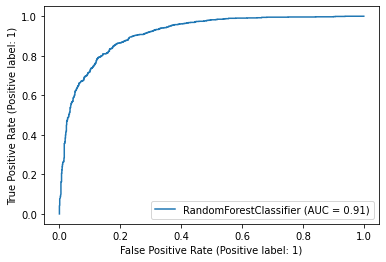

In [178]:
metrics.plot_roc_curve(Final_modRFC, x_test, y_test)

- The AUC score is 0.91

## Saving the Model

In [180]:
import joblib
joblib.dump(Final_modRFC,"Churn.pkl")

['Churn.pkl']